## Her kan vi visualisere dataen samlet med seaborn og matplotlib

Først kan vi lage en lett visualisering av en av elementene i luftdataen, f eks NO2 over tid. Her har vi laget en graf fra April til slutten av Mai (ca 2 måneder). 

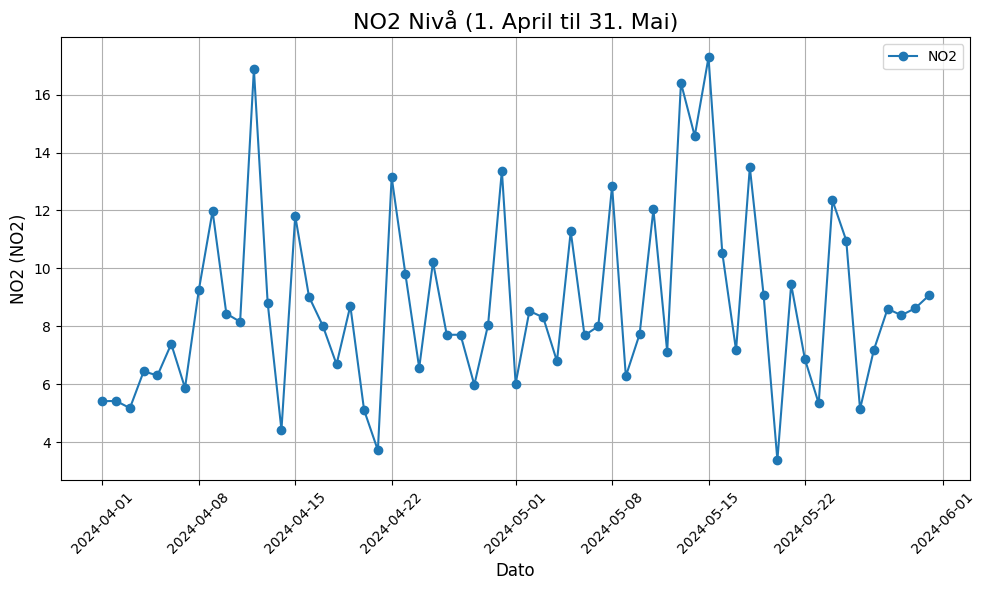

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Luftdata = pd.read_json('../data/df1_data.json')

# bruker pivot_df filtrerer for dato område
Luftdata["date"] = pd.to_datetime(Luftdata["date"]) 
filtered_df = Luftdata[(Luftdata["date"] >= "2024-04-01") & (Luftdata["date"] <= "2024-05-31")]


# Velger variabel
variable = "NO2"

# Plotter
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["date"], filtered_df[variable], marker="o", label=variable)

# Pynter og justerer grafen
plt.title(f"{variable} Nivå (1. April til 31. Mai)", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

Om vi ønsker å ha hele tidsperioden fra April til slutten av Juli, kan vi gjøre det slik at vi har en gjennomsnittsverdi for 3 dager, slik at det ikke blir for hakkete, og man kan se større mønstre

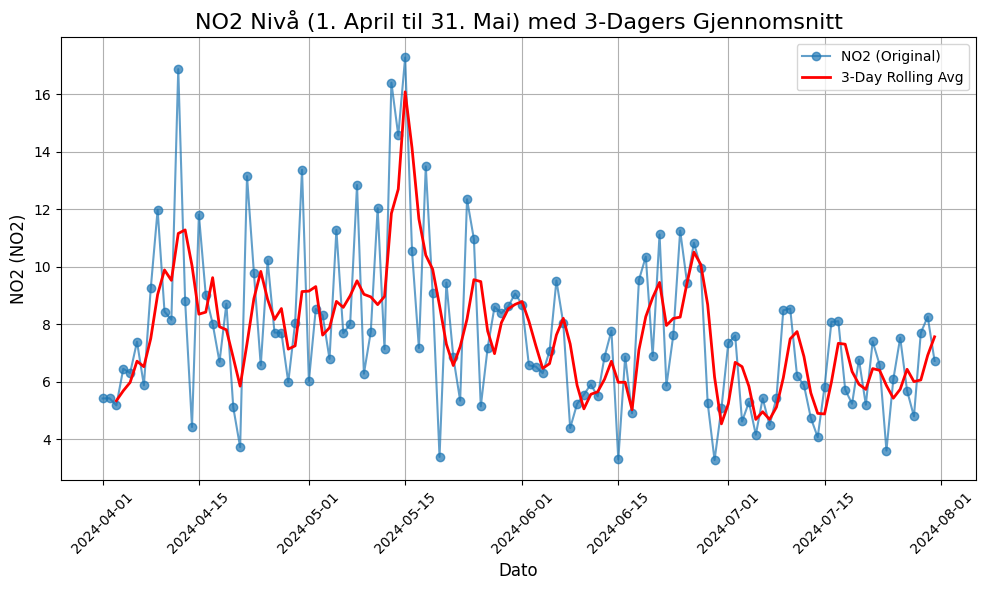

In [ ]:

filtered_df = Luftdata[(Luftdata["date"] >= "2024-04-01") & (Luftdata["date"] <= "2024-07-31")].copy()

variable = "NO2"

# Velger 3 dagers gjennomsnitt
avg_periode= 3
filtered_df.loc[:,f"{variable}_avg_periode"] = filtered_df[variable].rolling(window=avg_periode).mean()

# Opprinnelig data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["date"], filtered_df[variable], marker="o", label=f"{variable} (Original)", alpha=0.7)

# Plotter 3 dagers gjennomsnitt
plt.plot(filtered_df["date"], filtered_df[f"{variable}_avg_periode"], color="red", label=f"{avg_periode}-Day Rolling Avg", linewidth=2)

# Pynter og justerer
plt.title(f"{variable} Nivå (1. April til 31. Mai) med {avg_periode}-Dagers Gjennomsnitt", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Her kan vi lettere se trender. Vi kan nå prøve å kombinere flere år å bare beholde "gjennomsnittslinjen" for hvert år uten den fullstendige dataen: 

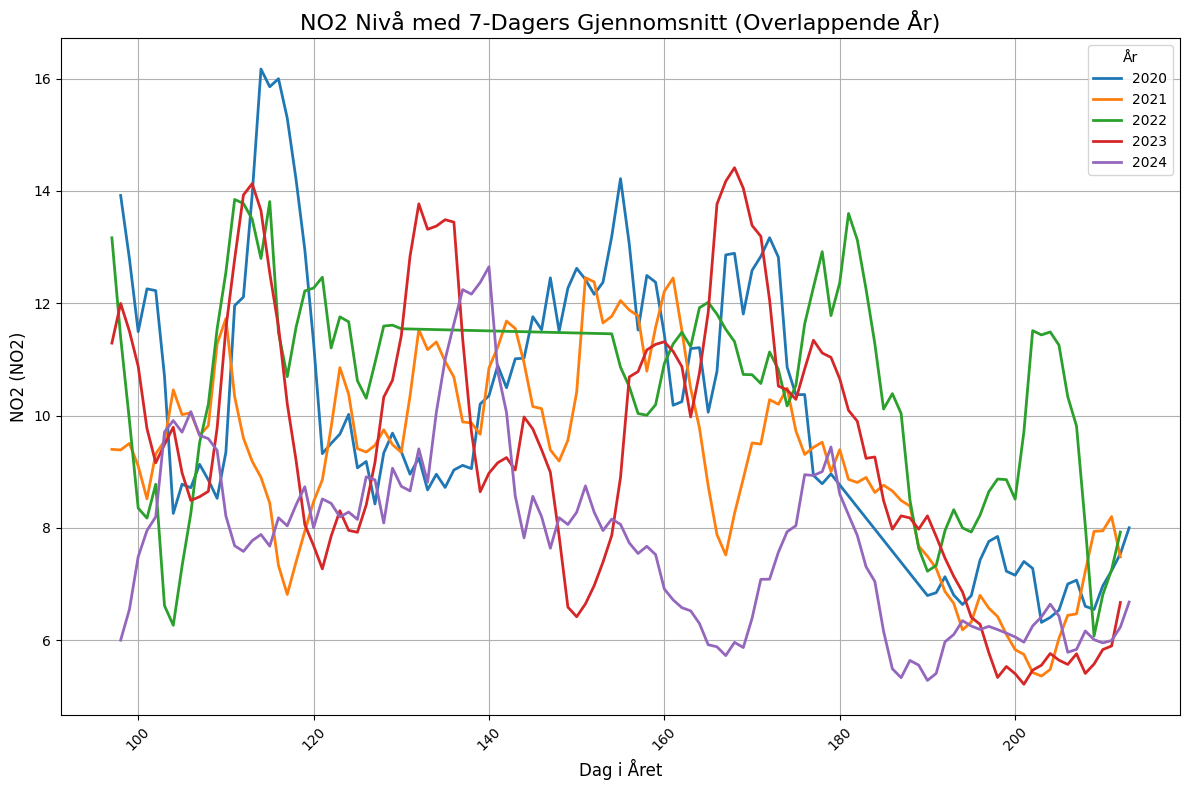

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Henter data fra fil
Luftdata = pd.read_json('../data/df1_fikset.json')

# Bytter til riktig datoformat
Luftdata["date"] = pd.to_datetime(Luftdata["date"])

# Få året
Luftdata["year"] = Luftdata["date"].dt.year

variable = "NO2"

# Gjennomsnittsvindu
avg_periode = 7

# Figur
plt.figure(figsize=(12, 8))

# Looper gjennom hvert år og lager gjennomsnitt
for year, group in Luftdata.groupby("year"):
    group = group.copy()
    group["day_of_year"] = group["date"].dt.day_of_year  # får datoene til å samsvare gjennom årene
    group[f"{variable}_avg_periode"] = group[variable].rolling(window=avg_periode).mean()
    
    # Plotter gjennomsnitt
    plt.plot(group["day_of_year"], group[f"{variable}_avg_periode"], label=f"{year}", linewidth=2)


plt.title(f"{variable} Nivå med {avg_periode}-Dagers Gjennomsnitt (Overlappende År)", fontsize=16)
plt.xlabel("Dag i Året", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="År")


plt.tight_layout()
plt.show()

Pearson Correlation between mean(wind_speed P1D) and NO2: -0.44


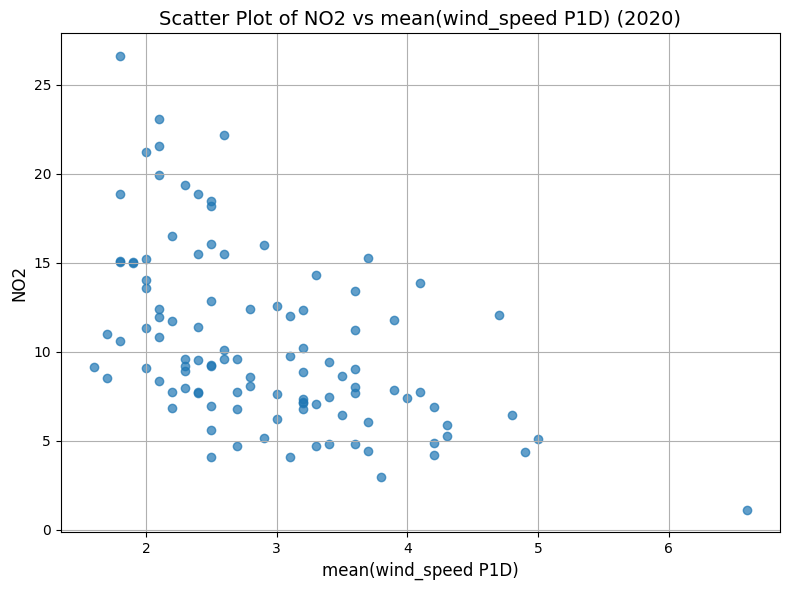

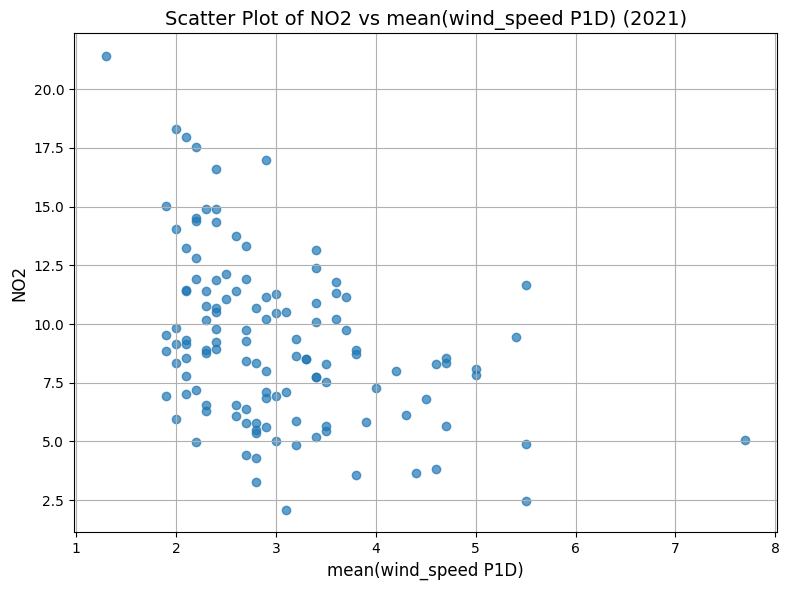

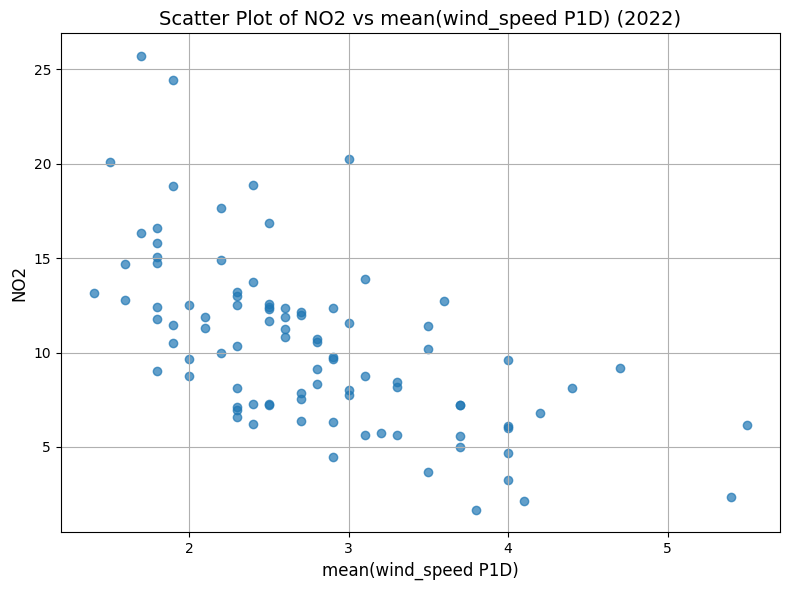

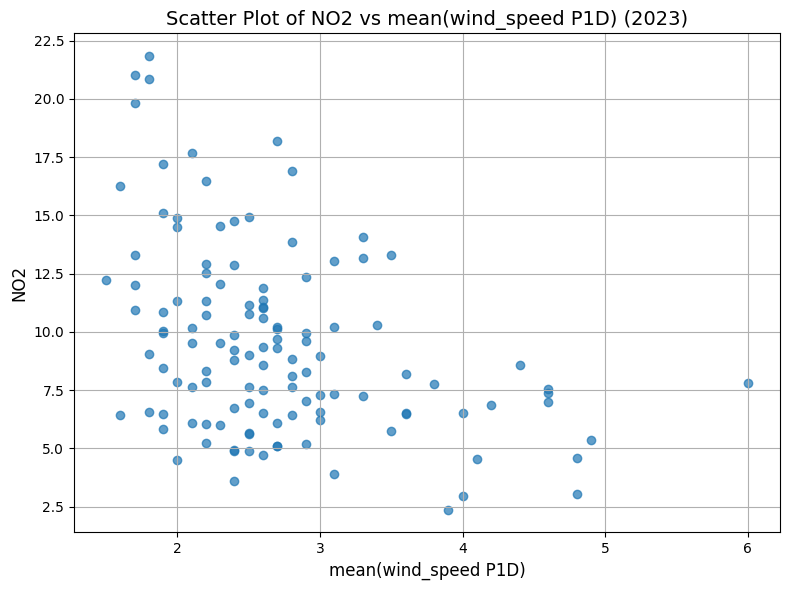

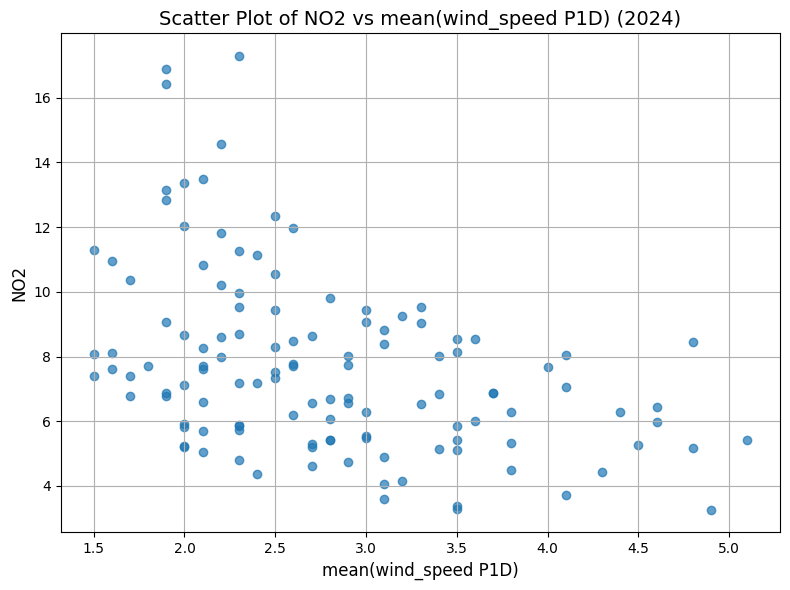

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Henter data
df1 = pd.read_json('../data/df1_data.json')
df2 = pd.read_json('../data/df2_data.json')

# Konverterer dato til riktig format
df1['date'] = pd.to_datetime(df1['date'], unit='ms')
df2['referenceTime'] = pd.to_datetime(df2['referenceTime'], unit='ms')

# Merger datasets
merged_df = pd.merge(df1, df2, left_on='date', right_on='referenceTime')

# Henter år for gruppering
merged_df['year'] = merged_df['date'].dt.year

# Variabler
x_variable = 'mean(wind_speed P1D)'  # Fra df2_data.json
y_variable = 'NO2'  # Fra df1_data.json

# correlation coefficient
correlation = merged_df[x_variable].corr(merged_df[y_variable])
print(f"Pearson Correlation between {x_variable} and {y_variable}: {correlation:.2f}")

# Plotter
for year, group in merged_df.groupby('year'):
    plt.figure(figsize=(8, 6))
    plt.scatter(group[x_variable], group[y_variable], alpha=0.7)
    plt.title(f'Scatter Plot of {y_variable} vs {x_variable} ({year})', fontsize=14)
    plt.xlabel(x_variable, fontsize=12)
    plt.ylabel(y_variable, fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()